# 🏔️ 🧩 Complete Guide to Statistical Testing A to Z

Welcome to this comprehensive guide on statistical testing! This notebook is designed to equip you with everything you need to know, from basic concepts to advanced applications in data science. Whether you're just starting out or you're a seasoned professional looking to sharpen your skills, this guide is for you!

## What Will You Learn?

We'll dive into a variety of statistical tests, each with a unique purpose in data analysis. By the end, you'll have a toolkit ready to tackle any data-driven challenge. Here's a peek at what we'll cover:

- **Chi-Square Test:** Learn how to test relationships between categorical variables.
- **Two-Sample T-Test & Paired T-Test:** Discover how to compare means from different groups and understand the statistical significance of their differences.
- **ANOVA (Analysis of Variance):** Explore how to test differences across multiple groups simultaneously.
- **Test of Correlation:** Uncover relationships and associations between continuous variables.
- **Non-Parametric Tests:** Get insights into methods that don't assume a specific data distribution, perfect for non-normal datasets.
- **A/B Testing (Continuous & Boolean Outcomes):** Master the art of comparing two versions of a variable to find the better-performing one in both continuous and binary outcomes.

## Why This Guide?

- **Step-by-Step Tutorials:** Each section includes clear explanations followed by practical examples, ensuring you not only learn but also apply your knowledge.
- **Interactive Learning:** Engage with interactive code cells that allow you to see the effects of statistical tests in real-time.

### How to Use This Notebook

- **Run the Cells:** Follow along with the code examples by running the cells yourself. Play around with the parameters to see how the results change.
- **Explore Further:** After completing the guided sections, try applying the tests to your own datasets to reinforce your learning.

Get ready to unlock the full potential of statistical testing in data science. Let's dive in and turn data into decisions!


# Dataset Description

The dataset used in this notebook is `Sales_and_Satisfaction_V1.3.csv`. It contains information on sales and customer satisfaction before and after an intervention, along with purchase behavior. Below is a detailed description of each column, including the data types and a brief explanation.

### Columns:

1. **Group** (object)
   - Indicates whether the entry is part of the control or treatment group.
   - Example values: `Control`, `Treatment`
   

2. **Customer_Segment** (object)
   - Segments customers into different value groups.
   - Example values: `High Value`, `Medium Value`
   

3. **Sales_Before** (float64)
   - Sales amount before the intervention.
   - Example values: `216.21`, `225.09`
   

4. **Sales_After** (float64)
   - Sales amount after the intervention.
   - Example values: `246.87`, `257.57`
   

5. **Customer_Satisfaction_Before** (float64)
   - Customer satisfaction score before the intervention.
   - Example values: `58.93`, `84.71`
   

6. **Customer_Satisfaction_After** (float64)
   - Customer satisfaction score after the intervention.
   - Example values: `61.60`, `83.84`
   

7. **Purchase_Made** (object)
   - Indicates whether a purchase was made.
   - Example values: `Yes`, `No`
   

### Dataset Overview:

- **Total Entries:** 10,000



# Chi-Square Test

The Chi-Square Test determines whether there is a significant association between two categorical variables.

## What is the Chi-Square Test?

A non-parametric test that assesses whether observed frequency distributions align with expected distributions under the null hypothesis.

## When to Use the Chi-Square Test

- Variables are categorical.
- Sample data is randomly drawn.
- Expected frequency for each cell is at least 5.

## Assumptions

1. Data should be randomly sampled.
2. Each expected frequency should be at least 5. If not, use Fisher's Exact Test for small sample sizes.

## Hypotheses for Chi-Square Test for Independence

- **Null Hypothesis (H0)**: No association between the categorical variables (independent).
- **Alternative Hypothesis (H1)**: An association exists between the categorical variables (not independent).

## Step-by-Step Guide

1. **Create a Contingency Table**: Displays the frequency distribution of variables.
2. **Calculate the Chi-Square Statistic**:

   $$
   \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
   $$
   
   where \( O_i \) is the observed frequency and \( E_i \) is the expected frequency.
3. **Determine the p-value**: Compare the Chi-Square statistic to a Chi-Square distribution with degrees of freedom:

   $$
   df = (r-1) \times (c-1)
   $$
   
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Odds Ratio

The odds ratio measures the association between two categorical variables. It represents the odds that an outcome will occur given a particular exposure compared to the odds of the outcome occurring without that exposure.

### When to Use the Odds Ratio

The odds ratio is particularly useful when you have found a significant association between two categorical variables using the Chi-Square Test or Fisher's Exact Test. It helps to quantify the strength and direction of the association.

### Calculating the Odds Ratio

For a 2x2 contingency table:

|                | Outcome Present (Yes) | Outcome Absent (No) |
|----------------|------------------------|---------------------|
| Exposure (Yes) | \( a \)                | \( b \)             |
| No Exposure    | \( c \)                | \( d \)             |

The odds ratio (OR) is calculated as:

$$
\text{Odds Ratio} = \frac{(a \cdot d)}{(b \cdot c)}
$$

Where:
- \( a \) = Number of cases with exposure and outcome present
- \( b \) = Number of cases with exposure and outcome absent
- \( c \) = Number of cases without exposure and outcome present
- \( d \) = Number of cases without exposure and outcome absent

### Interpretation of the Odds Ratio

- **Odds Ratio > 1**: Positive association between the variables.
- **Odds Ratio = 1**: No association between the variables.
- **Odds Ratio < 1**: Negative association between the variables.

## Example: Chi-Square Test for Independence

Using `Group` and `Purchase_Made` variables:

- **Null Hypothesis (H0)**: No association between `Group` and `Purchase_Made`.
- **Alternative Hypothesis (H1)**: An association exists between `Group` and `Purchase_Made`.

### Steps

1. **Create a Contingency Table**: Summarize the data.
2. **Calculate the Chi-Square Statistic**: Use observed and expected frequencies.
3. **Determine the p-value**: Compare the statistic to the Chi-Square distribution.
4. **Interpret the Results**: Based on the p-value.

### Interpretation

- **Chi-Square Statistic**: Measures the discrepancy between observed and expected frequencies.
- **p-value**: Probability of observing the test results under the null hypothesis.
- **Degrees of Freedom**: Calculated as (rows - 1) * (columns - 1).

If the p-value is < 0.05, reject the null hypothesis, indicating a significant association. Otherwise, fail to reject the null hypothesis.

### Odds Ratio Interpretation

- **Odds Ratio > 1**: Positive association between `Group` and `Purchase_Made`.
- **Odds Ratio = 1**: No association between `Group` and `Purchase_Made`.
- **Odds Ratio < 1**: Negative association between `Group` and `Purchase_Made`.

## Fisher's Exact Test

Fisher's Exact Test is an alternative to the Chi-Square Test when the sample size is small, or the expected frequency assumption is not met. Though we meet the conditions for the Chi-Square Test in this example, we'll demonstrate Fisher's Exact Test for practice purposes. Note that Fisher's Exact Test is only applicable for 2x2 contingency tables.

### Example: Fisher's Exact Test

Using the same `Group` and `Purchase_Made` variables:

- **Null Hypothesis (H0)**: No association between `Group` and `Purchase_Made`.
- **Alternative Hypothesis (H1)**: An association exists between `Group` and `Purchase_Made`.

### Steps

1. **Create a Contingency Table**: Summarize the data.
2. **Perform Fisher's Exact Test**: Calculate the exact p-value.
3. **Interpret the Results**: Based on the p-value.

### Interpretation

- **p-value**: Provides the probability of observing the test results under the null hypothesis.

If the p-value is < 0.05, reject the null hypothesis, indicating a significant association. Otherwise, fail to reject the null hypothesis.


In [1]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check the assumptions
print("\nChecking Assumptions...")

# Assumption 1: Random Sampling
# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Assumption 2: Expected Frequency
# Create a contingency table
contingency_table = pd.crosstab(sampled_data['Group'], sampled_data['Purchase_Made'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform the Chi-Square test and check the expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Check if all expected frequencies are at least 5
if (expected < 5).any():
    print("\nWarning: Some expected frequencies are less than 5. Switching to Fisher's Exact Test.")
    
    # Perform Fisher's Exact Test
    if contingency_table.shape == (2, 2):
        odds_ratio, fisher_p = stats.fisher_exact(contingency_table)
        print("\nFisher's Exact Test Results:")
        print(f"Odds Ratio: {odds_ratio:.4f}")
        print(f"p-value: {fisher_p:.4f}")

        # Interpret the p-value from Fisher's Exact Test
        alpha = 0.05
        print(f"\nSignificance Level: {alpha}")
        if fisher_p < alpha:
            print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Purchase_Made (Fisher's Exact Test).")
        else:
            print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Purchase_Made (Fisher's Exact Test).")
    else:
        print("\nFisher's Exact Test is not applicable for this contingency table size.")
else:
    print("\nAll expected frequencies are at least 5. Assumptions are satisfied.")
    
    # Display the results of the Chi-Square test
    print("\nChi-Square Test Results:")
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")

    # Interpret the p-value
    alpha = 0.05
    print(f"\nSignificance Level: {alpha}")
    if p < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Purchase_Made.")
        
        # Calculate the odds ratio for a 2x2 contingency table
        if contingency_table.shape == (2, 2):
            odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
            print(f"\nOdds Ratio: {odds_ratio:.4f}")
        else:
            print("\nOdds Ratio calculation is only applicable for 2x2 contingency tables.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Purchase_Made.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Contingency Table:
Purchase_Made   No  Yes
Group                  
Control        248  252
Treatment      237  263

Expected Frequenci

# Independent Samples T-Test (Two-Sample T-Test)

The Independent Samples T-Test, also known as the Two-Sample T-Test, determines whether there is a statistically significant difference between the means of two independent groups.

## What is the Independent Samples T-Test?

A parametric test that compares the means of two independent groups to see if they are significantly different from each other.

## When to Use the Independent Samples T-Test

- The dependent variable is continuous.
- The independent variable consists of two categorical, independent groups.
- Observations are independent of each other.
- The dependent variable is approximately normally distributed in each group.
- Homogeneity of variances: The variances in the two groups are equal.

## Assumptions

1. The dependent variable is normally distributed in each group.
2. Homogeneity of variances.


## Hypotheses for Independent Samples T-Test

- **Null Hypothesis (H0)**: The means of the two groups are equal.
- **Alternative Hypothesis (H1)**: The means of the two groups are not equal.


## Step-by-Step Guide

1. **Check Assumptions**: Verify normality and homogeneity of variances.
   - If normality is not met, consider using a non-parametric test such as the Mann-Whitney U Test.
   - If homogeneity of variances is not met, use Welch's T-Test, which does not assume equal variances.
2. **Calculate the T-Test Statistic**:

   $$
   t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
   $$
   
   where \(\bar{X}_1\) and \(\bar{X}_2\) are the sample means, \(s_1^2\) and \(s_2^2\) are the sample variances, and \(n_1\) and \(n_2\) are the sample sizes.
3. **Determine the p-value**: Compare the T-Test statistic to a t-distribution with degrees of freedom:

   $$
   df = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}{\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}}
   $$
   
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Example: Independent Samples T-Test

Using `Sales_Before` variable to compare `Control` and `Treatment` groups:

- **Null Hypothesis (H0)**: The mean `Sales_Before` in the `Control` group is equal to the mean `Sales_Before` in the `Treatment` group.
- **Alternative Hypothesis (H1)**: The mean `Sales_Before` in the `Control` group is not equal to the mean `Sales_Before` in the `Treatment` group.

### Steps

1. **Check Assumptions**: Verify normality and homogeneity of variances.
2. **Calculate the T-Test Statistic**: Use the sample means, variances, and sizes.
3. **Determine the p-value**: Compare the statistic to a t-distribution.
4. **Interpret the Results**: Based on the p-value.

### Interpretation

- **T-Test Statistic**: Measures the difference between group means relative to the variability in the groups.
- **p-value**: Probability of observing the test results under the null hypothesis.
- **Degrees of Freedom**: Calculated using the formula above.

If the p-value is < 0.05, reject the null hypothesis, indicating a significant difference between the means. Otherwise, fail to reject the null hypothesis.


In [2]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Check assumptions
print("\nChecking Assumptions...")

# Extract relevant columns from the sampled data
control_group = sampled_data[sampled_data['Group'] == 'Control']['Sales_Before']
treatment_group = sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before']

# Assumption 1: Normality
control_normality = stats.shapiro(control_group)
treatment_normality = stats.shapiro(treatment_group)

print("\nNormality Test (Shapiro-Wilk):")
print(f"Control group p-value: {control_normality.pvalue:.4f}")
print(f"Treatment group p-value: {treatment_normality.pvalue:.4f}")

# Assumption 2: Homogeneity of variances
levene_test = stats.levene(control_group, treatment_group)

print("\nHomogeneity of Variances Test (Levene's Test):")
print(f"p-value: {levene_test.pvalue:.4f}")

# Perform the appropriate T-Test based on the assumptions
if control_normality.pvalue > 0.05 and treatment_normality.pvalue > 0.05:
    if levene_test.pvalue > 0.05:
        # Perform the Independent Samples T-Test
        t_stat, p_val = stats.ttest_ind(control_group, treatment_group, equal_var=True)
        test_used = "Independent Samples T-Test"
    else:
        # Perform Welch's T-Test
        t_stat, p_val = stats.ttest_ind(control_group, treatment_group, equal_var=False)
        test_used = "Welch's T-Test"
else:
    # Perform the Mann-Whitney U Test
    t_stat, p_val = stats.mannwhitneyu(control_group, treatment_group)
    test_used = "Mann-Whitney U Test"

# Display the results of the T-Test
print(f"\n{test_used} Results:")
print(f"Test Statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print(f"Conclusion: Reject the null hypothesis. There is a significant difference in Sales_Before between Control and Treatment groups (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant difference in Sales_Before between Control and Treatment groups (using {test_used}).")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Normality Test (Shapiro-Wilk):
Control group p-value: 0.7610
Treatment group p-value: 0.5947

Homogeneity of Variances Test (Levene's 

# Paired T-Test

The Paired T-Test determines whether there is a statistically significant difference between the means of two related groups.

## What is the Paired T-Test?

A parametric test that compares the means of two related groups to see if they are significantly different from each other.

## When to Use the Paired T-Test

- The dependent variable is continuous.
- The observations are paired or matched in some meaningful way.

## Assumptions

1. The differences between pairs are normally distributed.
   - If normality is not met, use the Wilcoxon Signed-Rank Test.

## Hypotheses for Paired T-Test

- **Null Hypothesis (H0)**: The mean difference between the paired observations is zero.
- **Alternative Hypothesis (H1)**: The mean difference between the paired observations is not zero.

## Step-by-Step Guide

1. **Check Assumptions**: Verify normality of the differences.
2. **Calculate the T-Test Statistic**:

   $$
   t = \frac{\bar{d}}{s_d / \sqrt{n}}
   $$
   
   where \(\bar{d}\) is the mean of the differences, \(s_d\) is the standard deviation of the differences, and \(n\) is the number of pairs.
3. **Determine the p-value**: Compare the T-Test statistic to a t-distribution with \(n-1\) degrees of freedom.
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Example: Paired T-Test

Using `Sales_Before` and `Sales_After` variables:

- **Null Hypothesis (H0)**: The mean difference between `Sales_Before` and `Sales_After` is zero.
- **Alternative Hypothesis (H1)**: The mean difference between `Sales_Before` and `Sales_After` is not zero.

### Steps

1. **Check Assumptions**: Verify normality of the differences.
2. **Perform the Paired T-Test**: Use the sample means, variances, and sizes.
3. **Determine the p-value**: Compare the statistic to a t-distribution.
4. **Interpret the Results**: Based on the p-value.

### Interpretation

- **T-Test Statistic**: Measures the difference between the paired means relative to the variability in the differences.
- **p-value**: Probability of observing the test results under the null hypothesis.
- **Degrees of Freedom**: \(n - 1\)

If the p-value is < 0.05, reject the null hypothesis, indicating a significant difference between the paired means. Otherwise, fail to reject the null hypothesis.


In [3]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract relevant columns from the sampled data
sales_before = sampled_data['Sales_Before']
sales_after = sampled_data['Sales_After']

# Check assumptions
print("\nChecking Assumptions...")

# Assumption: Normality of differences
differences = sales_after - sales_before
normality_test = stats.shapiro(differences)

print("\nNormality Test (Shapiro-Wilk) for Differences:")
print(f"p-value: {normality_test.pvalue:.4f}")

# Perform the appropriate test based on the assumption
if normality_test.pvalue > 0.05:
    # Perform the Paired T-Test
    t_stat, p_val = stats.ttest_rel(sales_before, sales_after)
    test_used = "Paired T-Test"
else:
    # Perform the Wilcoxon Signed-Rank Test
    t_stat, p_val = stats.wilcoxon(sales_before, sales_after)
    test_used = "Wilcoxon Signed-Rank Test"

# Display the results of the test
print(f"\n{test_used} Results:")
print(f"Test Statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print(f"Conclusion: Reject the null hypothesis. There is a significant difference between Sales_Before and Sales_After (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant difference between Sales_Before and Sales_After (using {test_used}).")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Normality Test (Shapiro-Wilk) for Differences:
p-value: 0.0000

Wilcoxon Signed-Rank Test Results:
Test Statistic: 2.0000
p-value: 0.0

# ANOVA (Analysis of Variance)

The ANOVA test determines whether there are statistically significant differences between the means of three or more independent groups.

## What is ANOVA?

A parametric test that compares the means of three or more independent groups to see if at least one of the group means is significantly different from the others.

## When to Use ANOVA

- The dependent variable is continuous.
- The independent variable consists of three or more categorical, independent groups.
- Observations are independent of each other.
- The dependent variable is approximately normally distributed in each group.
- Homogeneity of variances: The variances in the groups are equal.

## Assumptions

1. The dependent variable is normally distributed in each group.
   - If normality is not met, consider using a non-parametric test such as the Kruskal-Wallis Test.
2. Homogeneity of variances.
   - If homogeneity of variances is not met, use Welch's ANOVA.

## Hypotheses for ANOVA

- **Null Hypothesis (H0)**: All group means are equal.
- **Alternative Hypothesis (H1)**: At least one group mean is different.

## Step-by-Step Guide

1. **Check Assumptions**: Verify normality and homogeneity of variances.
2. **Calculate the ANOVA F-Statistic**:

   $$
   F = \frac{\text{between-group variability}}{\text{within-group variability}}
   $$

3. **Determine the p-value**: Compare the F-Statistic to an F-distribution with appropriate degrees of freedom.
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Post Hoc Analysis

If the ANOVA test indicates significant differences, conduct a post hoc analysis to identify which groups differ from each other.

### Tukey's HSD Test

Tukey's Honestly Significant Difference (HSD) test compares all possible pairs of group means to determine which groups are significantly different.

## Example: ANOVA

Using `Customer_Satisfaction_After` variable across different `Customer_Segment` categories:

- **Null Hypothesis (H0)**: The mean `Customer_Satisfaction_After` is equal across all `Customer_Segment` categories.
- **Alternative Hypothesis (H1)**: At least one mean `Customer_Satisfaction_After` is different across `Customer_Segment` categories.

### Steps

1. **Check Assumptions**: Verify normality and homogeneity of variances.
2. **Perform ANOVA**: Use the sample means, variances, and sizes.
3. **Determine the p-value**: Compare the statistic to an F-distribution.
4. **Interpret the Results**: Based on the p-value.
5. **Conduct Post Hoc Analysis**: If ANOVA is significant, perform Tukey's HSD test to determine which groups differ.

### Interpretation

- **ANOVA F-Statistic**: Measures the ratio of between-group variability to within-group variability.
- **p-value**: Probability of observing the test results under the null hypothesis.

If the p-value is < 0.05, reject the null hypothesis, indicating that at least one group mean is significantly different. Otherwise, fail to reject the null hypothesis.


In [4]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract relevant columns from the sampled data
customer_satisfaction_after = sampled_data['Customer_Satisfaction_After']
customer_segment = sampled_data['Customer_Segment']

# Check assumptions
print("\nChecking Assumptions...")

# Assumption: Normality of each group
groups = sampled_data.groupby('Customer_Segment')['Customer_Satisfaction_After']
normality_p_values = groups.apply(lambda x: stats.shapiro(x)[1])
print("\nNormality Test (Shapiro-Wilk) for each group:")
print(normality_p_values)

# Assumption: Homogeneity of variances
levene_test = stats.levene(*[group for name, group in groups])
print("\nHomogeneity of Variances Test (Levene's Test):")
print(f"p-value: {levene_test.pvalue:.4f}")

# Perform the appropriate ANOVA test based on the assumptions
if all(normality_p_values > 0.05):
    if levene_test.pvalue > 0.05:
        # Perform ANOVA
        model = ols('Customer_Satisfaction_After ~ C(Customer_Segment)', data=sampled_data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        test_used = "ANOVA"
    else:
        # Perform Welch's ANOVA
        model = ols('Customer_Satisfaction_After ~ C(Customer_Segment)', data=sampled_data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2, robust='hc3')
        test_used = "Welch's ANOVA"
else:
    # Perform Kruskal-Wallis Test
    kruskal_test = stats.kruskal(*[group for name, group in groups])
    anova_table = kruskal_test
    test_used = "Kruskal-Wallis Test"

# Display the results of the ANOVA test
print(f"\n{test_used} Results:")
print(anova_table)

# Interpret the p-value
alpha = 0.05
if test_used == "Kruskal-Wallis Test":
    p_val = anova_table.pvalue
else:
    p_val = anova_table['PR(>F)'][0]

print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print(f"Conclusion: Reject the null hypothesis. There is a significant difference in Customer_Satisfaction_After across different Customer_Segment categories (using {test_used}).")
    
    # Perform Post Hoc Analysis using Tukey's HSD Test
    print("\nPerforming Tukey's HSD Test...")
    tukey = pairwise_tukeyhsd(endog=sampled_data['Customer_Satisfaction_After'], groups=sampled_data['Customer_Segment'], alpha=0.05)
    print(tukey)
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant difference in Customer_Satisfaction_After across different Customer_Segment categories (using {test_used}).")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Normality Test (Shapiro-Wilk) for each group:
Customer_Segment
High Value      5.652129e-19
Low Value       2.664373e-05
Medium Value 

Sampled Dataset Preview:
          Group Customer_Segment  Sales_Before  Sales_After  \
6252    Control        Low Value    202.937510   245.562529   
4684  Treatment     Medium Value    124.808089   205.601701   
1731    Control     Medium Value    113.990458   133.337069   
4742  Treatment       High Value    261.604426   419.422090   
4521    Control        Low Value    130.677272   160.140266   

      Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
6252                     69.112754                    76.000000           Yes  
4684                     52.890804                    69.813121           Yes  
1731                     69.575004                    60.940449            No  
4742                     82.913483                   100.000000           Yes  
4521                     62.189051                    67.945571           Yes  

Checking for Normality...


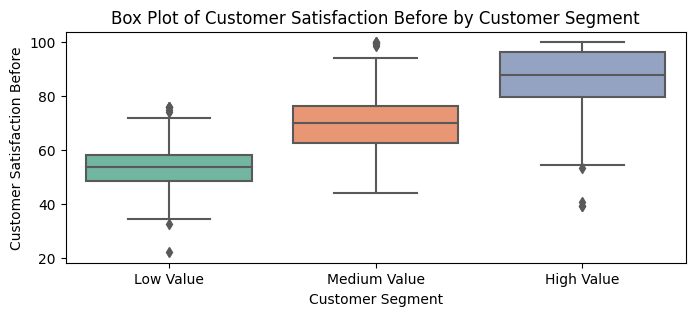

Normality Test for Low Value Segment: W=0.9923, p-value=0.0890
Normality Test for Medium Value Segment: W=0.9921, p-value=0.0746
Normality Test for High Value Segment: W=0.9144, p-value=0.0000

Checking for Equal Variances...
Levene's Test for Equal Variances: W=22.4802, p-value=0.0000

Assumptions not met, performing non-parametric tests...

Performing Kruskal-Wallis H Test (if normality assumption not met)...
Kruskal-Wallis H Test Result: H=648.6686, p-value=0.0000
Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments (Kruskal-Wallis H Test).

Performing Welch's ANOVA (if equal variance assumption not met)...
Welch's ANOVA Result: t-statistic=-21.5198, p-value=0.0000
Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments (Welch's ANOVA).


In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')


# Replace inf values with NaN and drop rows with NaN values in 'Customer_Segment' and 'Customer_Satisfaction_Before'
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
data.dropna(subset=['Customer_Segment', 'Customer_Satisfaction_Before'], inplace=True)

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Display the first few rows of the sampled dataset
print("Sampled Dataset Preview:")
print(sampled_data.head())

# Check for normality
print("\nChecking for Normality...")

# Visualize the distribution with box plots
plt.figure(figsize=(8, 3))
sns.boxplot(x='Customer_Segment', y='Customer_Satisfaction_Before', data=sampled_data, palette='Set2')
plt.title('Box Plot of Customer Satisfaction Before by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Satisfaction Before')
plt.show()

# Perform Shapiro-Wilk test for each group
segments = sampled_data['Customer_Segment'].unique()
normality_passed = True
for segment in segments:
    segment_data = sampled_data[sampled_data['Customer_Segment'] == segment]['Customer_Satisfaction_Before']
    w, p_value = stats.shapiro(segment_data)
    print(f"Normality Test for {segment} Segment: W={w:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        normality_passed = False

# Check for equal variances
print("\nChecking for Equal Variances...")
levene_test = stats.levene(
    sampled_data[sampled_data['Customer_Segment'] == 'Low Value']['Customer_Satisfaction_Before'],
    sampled_data[sampled_data['Customer_Segment'] == 'Medium Value']['Customer_Satisfaction_Before'],
    sampled_data[sampled_data['Customer_Segment'] == 'High Value']['Customer_Satisfaction_Before']
)
print(f"Levene's Test for Equal Variances: W={levene_test[0]:.4f}, p-value={levene_test[1]:.4f}")
equal_variances = levene_test[1] >= 0.05

# Perform ANOVA if assumptions are met, otherwise perform non-parametric tests
alpha = 0.05
if normality_passed and equal_variances:
    print("\nPerforming ANOVA...")
    model = ols('Customer_Satisfaction_Before ~ C(Customer_Segment)', data=sampled_data).fit()
    anova_results = anova_lm(model)
    print(anova_results)

    # Interpret the results
    p_value = anova_results['PR(>F)'][0]
    print(f"\nSignificance Level: {alpha}")
    if p_value < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the means of the Customer Segments.")
else:
    print("\nAssumptions not met, performing non-parametric tests...")
    
    # Kruskal-Wallis H Test (Non-Parametric)
    print("\nPerforming Kruskal-Wallis H Test (if normality assumption not met)...")
    kruskal_result = stats.kruskal(
        sampled_data[sampled_data['Customer_Segment'] == 'Low Value']['Customer_Satisfaction_Before'],
        sampled_data[sampled_data['Customer_Segment'] == 'Medium Value']['Customer_Satisfaction_Before'],
        sampled_data[sampled_data['Customer_Segment'] == 'High Value']['Customer_Satisfaction_Before']
    )
    print(f"Kruskal-Wallis H Test Result: H={kruskal_result[0]:.4f}, p-value={kruskal_result[1]:.4f}")

    # Interpret the results of Kruskal-Wallis H Test
    if kruskal_result[1] < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments (Kruskal-Wallis H Test).")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the means of the Customer Segments (Kruskal-Wallis H Test).")

    # Welch's ANOVA (Unequal Variances)
    print("\nPerforming Welch's ANOVA (if equal variance assumption not met)...")
    welch_anova_results = stats.ttest_ind(
        sampled_data[sampled_data['Customer_Segment'] == 'Low Value']['Customer_Satisfaction_Before'],
        sampled_data[sampled_data['Customer_Segment'] == 'Medium Value']['Customer_Satisfaction_Before'],
        equal_var=False
    )
    print(f"Welch's ANOVA Result: t-statistic={welch_anova_results[0]:.4f}, p-value={welch_anova_results[1]:.4f}")

    # Interpret the results of Welch's ANOVA
    if welch_anova_results[1] < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant difference between the means of the Customer Segments (Welch's ANOVA).")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the means of the Customer Segments (Welch's ANOVA).")


# Correlation Test

The correlation test determines the strength and direction of the linear relationship between two continuous variables.

## What is a Correlation Test?

A statistical method used to assess the strength and direction of the linear relationship between two continuous variables.

## When to Use a Correlation Test

- Both variables are continuous.
- The relationship between the variables is linear.
- Data pairs are independent of each other.

## Types of Correlation Tests

1. **Pearson Correlation**: Measures the linear relationship between two continuous variables. Assumes both variables are normally distributed.
   - If normality is not met, use Spearman's Rank Correlation.
2. **Spearman's Rank Correlation**: Measures the monotonic relationship between two continuous or ordinal variables.

## Hypotheses for Correlation Test

- **Null Hypothesis (H0)**: There is no correlation between the variables.
- **Alternative Hypothesis (H1)**: There is a correlation between the variables.

## Step-by-Step Guide

1. **Check Assumptions**: Verify normality of both variables.
   - If normality is not met, use Spearman's Rank Correlation.
2. **Calculate the Correlation Coefficient**:

   $$
   r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n \sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}}
   $$

3. **Determine the p-value**: Compare the correlation coefficient to a t-distribution.
4. **Interpret the Results**: If the p-value is ≤ 0.05, reject the null hypothesis.

## Example: Correlation Test

Using `Sales_Before` and `Sales_After` variables:

- **Null Hypothesis (H0)**: There is no correlation between `Sales_Before` and `Sales_After`.
- **Alternative Hypothesis (H1)**: There is a correlation between `Sales_Before` and `Sales_After`.

### Steps

1. **Check Assumptions**: Verify normality of both variables.
2. **Perform the Correlation Test**: Use the sample means, variances, and sizes.
3. **Determine the p-value**: Compare the statistic to a t-distribution.
4. **Interpret the Results**: Based on the p-value.

### Interpretation

- **Correlation Coefficient (r)**: Measures the strength and direction of the linear relationship between the variables.
- **p-value**: Probability of observing the test results under the null hypothesis.

If the p-value is < 0.05, reject the null hypothesis, indicating a significant correlation between the variables. Otherwise, fail to reject the null hypothesis.


In [6]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract relevant columns from the sampled data
sales_before = sampled_data['Sales_Before']
sales_after = sampled_data['Sales_After']

# Check assumptions
print("\nChecking Assumptions...")

# Assumption: Normality of both variables
normality_test_before = stats.shapiro(sales_before)
normality_test_after = stats.shapiro(sales_after)

print("\nNormality Test (Shapiro-Wilk):")
print(f"Sales_Before p-value: {normality_test_before.pvalue:.4f}")
print(f"Sales_After p-value: {normality_test_after.pvalue:.4f}")

# Perform the appropriate correlation test based on the assumptions
if normality_test_before.pvalue > 0.05 and normality_test_after.pvalue > 0.05:
    # Perform Pearson Correlation
    correlation_coefficient, p_val = stats.pearsonr(sales_before, sales_after)
    test_used = "Pearson Correlation"
else:
    # Perform Spearman's Rank Correlation
    correlation_coefficient, p_val = stats.spearmanr(sales_before, sales_after)
    test_used = "Spearman's Rank Correlation"

# Display the results of the correlation test
print(f"\n{test_used} Results:")
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print(f"Conclusion: Reject the null hypothesis. There is a significant correlation between Sales_Before and Sales_After (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant correlation between Sales_Before and Sales_After (using {test_used}).")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Normality Test (Shapiro-Wilk):
Sales_Before p-value: 0.4559
Sales_After p-value: 0.0004

Spearman's Rank Correlation Results:
Correlat

# A/B Testing (Continuous & Boolean Outcomes)

A/B testing, also known as split testing, is a method to compare two versions of a variable to determine which one performs better. It is commonly used in marketing, user experience research, and product development.

## What is A/B Testing?

A/B testing involves randomly splitting a sample into two groups:
- **Control Group**: Does not receive the treatment.
- **Treatment Group**: Receives the treatment.

The goal is to determine if there is a statistically significant difference between the two groups.

## Continuous Outcomes

When the outcome is continuous, such as sales or scores, we use statistical tests like the independent samples t-test to compare the means of the two groups.

### Assumptions for Continuous Outcomes

1. **Independence**: Observations are independent of each other.
2. **Normality**: The data follows a normal distribution.
   - If normality is not met, use a non-parametric test like the Mann-Whitney U test.
3. **Homogeneity of Variances**: Variances of the two groups are equal.
   - If variances are not equal, use Welch’s t-test.

## Boolean Outcomes

When the outcome is boolean (yes/no), we use the Chi-Square test for independence or Fisher's Exact test to compare the proportions of the two groups.

### Assumptions for Boolean Outcomes

1. **Independence**: Observations are independent of each other.
2. **Expected Frequency**: Each expected frequency should be at least 5.
   - If expected frequencies are less than 5, use Fisher's Exact Test.

## Step-by-Step Guide for A/B Testing

### Continuous Outcomes

1. **Check Assumptions**:
   - **Normality**: Use Shapiro-Wilk test.
   - **Homogeneity of Variances**: Use Levene’s test.
2. **Perform the Appropriate Test**:
   - **t-test**: If normality and homogeneity of variances are met.
   - **Welch’s t-test**: If variances are not equal.
   - **Mann-Whitney U test**: If normality is not met.
3. **Interpret Results**: Compare the p-value to the significance level (α = 0.05).

### Boolean Outcomes

1. **Create a Contingency Table**: Summarize the data.
2. **Perform the Appropriate Test**:
   - **Chi-Square Test**: If expected frequencies are at least 5.
   - **Fisher's Exact Test**: If expected frequencies are less than 5.
3. **Interpret Results**: Compare the p-value to the significance level (α = 0.05).

### Example: A/B Testing

Using `Sales_Before` and `Sales_After` for continuous outcomes and `Purchase_Made` for boolean outcomes.

#### Continuous Outcomes

- **Null Hypothesis (H0)**: No difference in `Sales_Before` between Control and Treatment groups.
- **Alternative Hypothesis (H1)**: Difference in `Sales_Before` between Control and Treatment groups.

#### Boolean Outcomes

- **Null Hypothesis (H0)**: No association between `Group` and `Purchase_Made`.
- **Alternative Hypothesis (H1)**: Association between `Group` and `Purchase_Made`.

### Interpretation

- **Continuous Outcomes**: Based on the chosen test's p-value.
- **Boolean Outcomes**: Based on the chosen test's p-value.



In [7]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract relevant columns from the sampled data
group = sampled_data['Group']
sales_before = sampled_data['Sales_Before']
sales_after = sampled_data['Sales_After']
purchase_made = sampled_data['Purchase_Made']

# Continuous Outcomes
print("\nA/B Testing for Continuous Outcomes...")

# Assumption: Normality
normality_test_control = stats.shapiro(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'])
normality_test_treatment = stats.shapiro(sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'])

print("\nNormality Test (Shapiro-Wilk):")
print(f"Control group p-value: {normality_test_control.pvalue:.4f}")
print(f"Treatment group p-value: {normality_test_treatment.pvalue:.4f}")

# Assumption: Homogeneity of Variances
levene_test = stats.levene(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'],
                           sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'])

print("\nHomogeneity of Variances Test (Levene's Test):")
print(f"p-value: {levene_test.pvalue:.4f}")

# Perform the appropriate test based on the assumptions
if normality_test_control.pvalue > 0.05 and normality_test_treatment.pvalue > 0.05:
    if levene_test.pvalue > 0.05:
        # Perform Independent Samples T-Test
        t_stat, p_val = stats.ttest_ind(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'],
                                        sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'])
        test_used = "Independent Samples T-Test"
    else:
        # Perform Welch's T-Test
        t_stat, p_val = stats.ttest_ind(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'],
                                        sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'], equal_var=False)
        test_used = "Welch's T-Test"
else:
    # Perform Mann-Whitney U Test
    t_stat, p_val = stats.mannwhitneyu(sampled_data[sampled_data['Group'] == 'Control']['Sales_Before'],
                                       sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before'])
    test_used = "Mann-Whitney U Test"

# Display the results of the continuous outcomes test
print(f"\n{test_used} Results:")
print(f"Test Statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print(f"Conclusion: Reject the null hypothesis. There is a significant difference in Sales_Before between Control and Treatment groups (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant difference in Sales_Before between Control and Treatment groups (using {test_used}).")

# Boolean Outcomes
print("\nA/B Testing for Boolean Outcomes...")

# Create a Contingency Table
contingency_table = pd.crosstab(sampled_data['Group'], sampled_data['Purchase_Made'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform the appropriate test based on the assumptions
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

if (expected < 5).any():
    print("\nWarning: Some expected frequencies are less than 5. Switching to Fisher's Exact Test.")
    if contingency_table.shape == (2, 2):
        odds_ratio, fisher_p = stats.fisher_exact(contingency_table)
        print("\nFisher's Exact Test Results:")
        print(f"Odds Ratio: {odds_ratio:.4f}")
        print(f"p-value: {fisher_p:.4f}")

        # Interpret the p-value from Fisher's Exact Test
        if fisher_p < alpha:
            print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Purchase_Made (using Fisher's Exact Test).")
        else:
            print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Purchase_Made (using Fisher's Exact Test).")
    else:
        print("\nFisher's Exact Test is not applicable for this contingency table size.")
else:
    print("\nAll expected frequencies are at least 5. Assumptions are satisfied.")
    
    # Display the results of the Chi-Square test
    print("\nChi-Square Test Results:")
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")

    # Interpret the p-value
    if p < alpha:
        print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Purchase_Made (using Chi-Square Test).")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Purchase_Made (using Chi-Square Test).")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

A/B Testing for Continuous Outcomes...

Normality Test (Shapiro-Wilk):
Control group p-value: 0.7610
Treatment group p-value: 0.5947

Homogeneity of Variances 

---
## Thank You for Exploring This Notebook!


If you have any questions, suggestions, or just want to discuss any of the topics further, please don't hesitate to reach out or leave a comment. Your feedback is not only welcome but also invaluable!

Happy analyzing, and stay curious!

---